# <u>IE 3013: Project: Boston Housing Price Prediction </u>

#### By: Masha Volkova and Aditi Patil 

## Objective:
- To build Ridge and Lasso regression models to predict the median value of Boston houses using the Boston Housing Dataset 
- Compare the performance of Ridge and Lasso regression models 
- To study the impact of high correlation among predictors on the regression coefficients


## Overview of the dataset

#### The Dataset
The <u>Boston Housing Dataset</u> (found at https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) is derived from the U.S. Census Service and concerns housing in the area of Boston Mass.
 
#### The Variables
The <u>predictor variables</u>:

`CRIM` - per capita crime rate by town

`ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.

`INDUS` - proportion of non-retail business acres per town.

`CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

`NOX` - nitric oxides concentration (parts per 10 million)

`RM` - average number of rooms per dwelling

`AGE` - proportion of owner-occupied units built prior to 1940

`DIS` - weighted distances to five Boston employment centres

`RAD` - index of accessibility to radial highways

`TAX` - full-value property-tax rate per $10,000

`PTRATIO` - pupil-teacher ratio by town

`B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

`LSTAT` - % lower status of the population

The <u>response variable</u>:

`MEDV` - Median value of owner-occupied homes in $1000's

The Boston Housing dataset contains a variety of predictor variables. Most of the predictor variables were numerical such as the crime rate per capita, average number of rooms per dwelling, student-teacher ratio, and weighted distances to Boston employment centers.

There were also two categorical variables `CHAS` and `RAD`. `RAD` is the index of accessibility to radial highways. `CHAS` the Charles River dummy variable (1- house is by the river, 0-house is not by the river)
The response variable for the dataset is the median value of owner occupied homes


## Data Exploration and Preprocessing

Since Ridge and Lasso Regression are going to be used, the columns need to be  scaled. This is done to ensure that the regularization term has equal scaling effects on each of the coefficients.

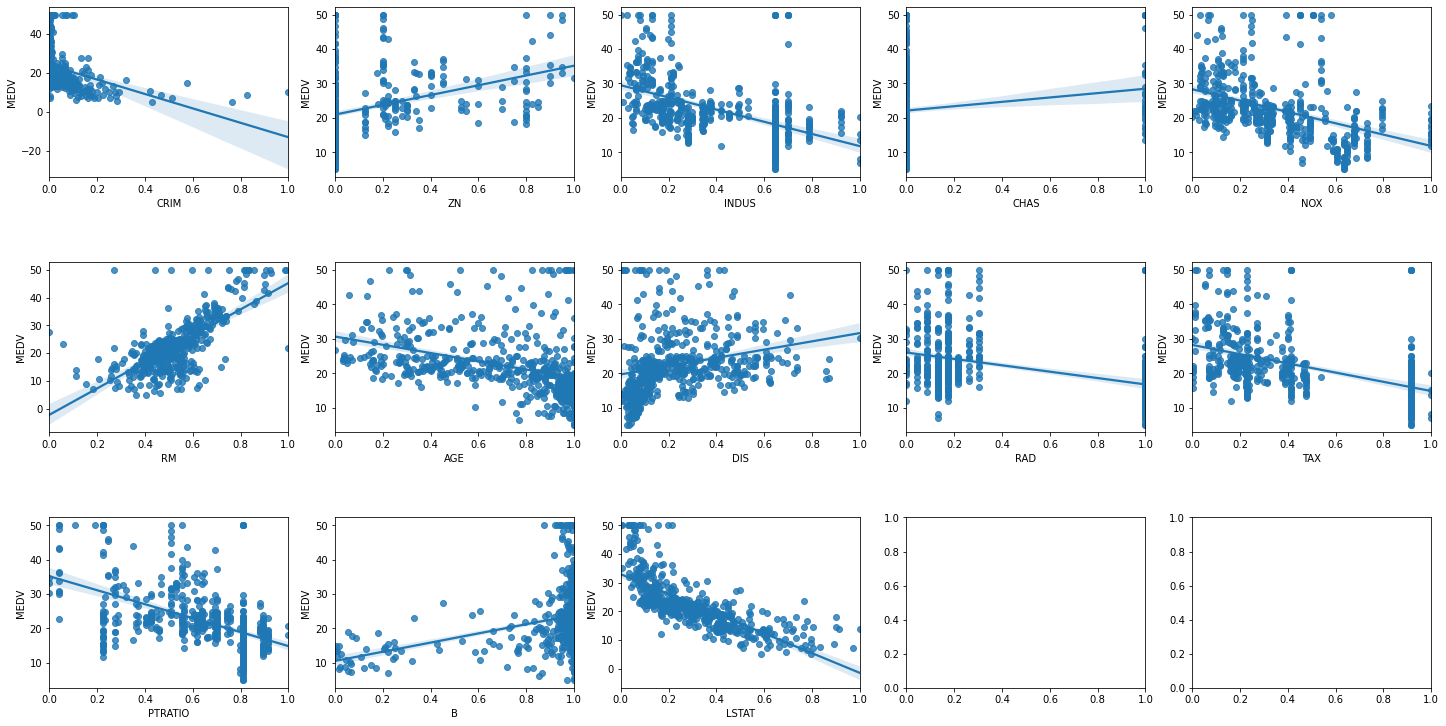

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

from sklearn import preprocessing

# Scales columns, plots them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_cells = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = data.loc[:,column_cells]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_cells)
#x = pd.DataFrame(data=x, columns=column_cells)

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_cells):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The the plots above are of all the predictor variables vs the response variable `MEDV`. In these plots one can see that there are some outliers, which need to be taken into consideration.

Most numberical variable distributions have a skew present.
The categorical variables classes are unbalanced (more instances of a class than the other class)

From the plots of all the explanatory variables against the response `MEDV`, there don't appear to be any obvious non-linear relationships

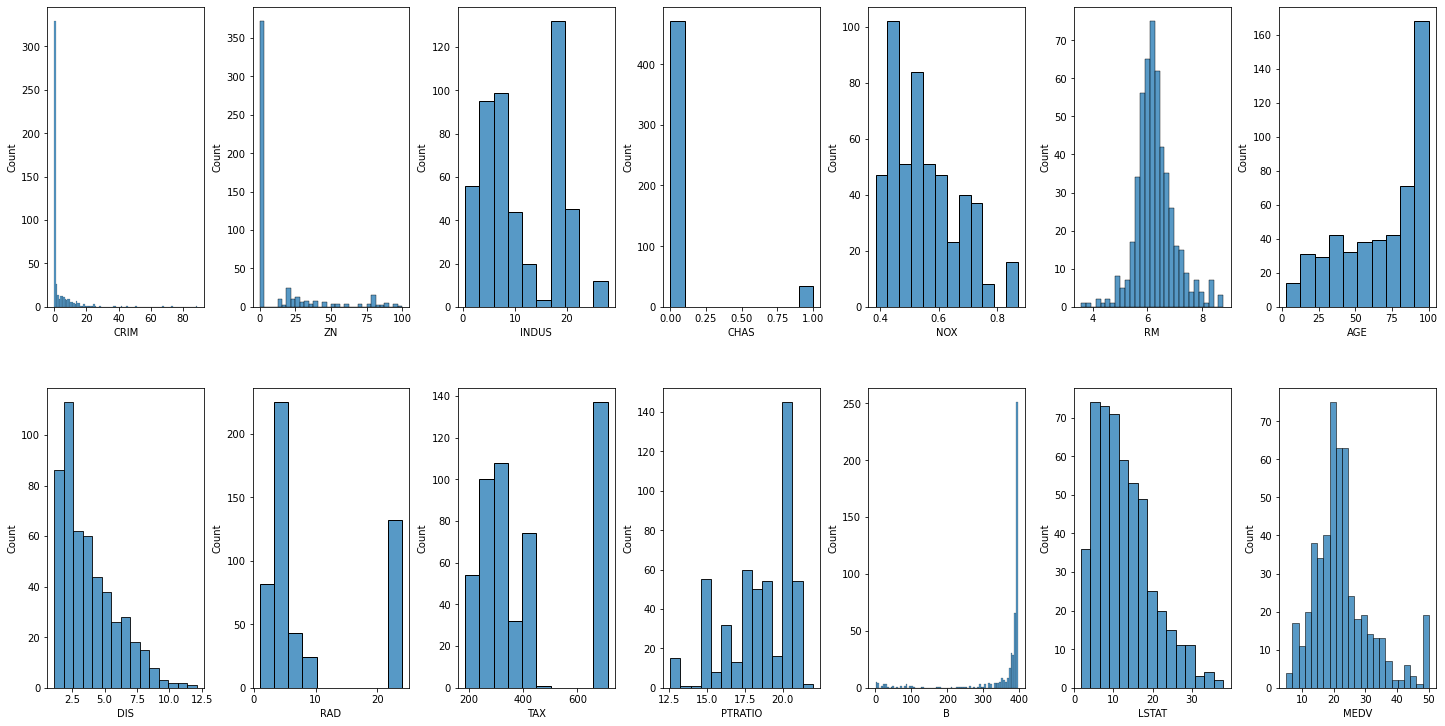

In [2]:
#plots distributions
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

- For most of the numerical variable distributions, there is a skew present.(`DIS`, `PTRATIO`, `LSTAT`, `NOX`, `AGE`)
- `TAX` seems to be bimodal
- There also appears to be a few outliers in the data (`ZN`, `MEDV`), which need to be taken into account
- The categorical variables (`CHAS` and `RAD`) are unbalanced (more instances of one class than the other class)

#### Checking for Correlation between Explanatory Variables

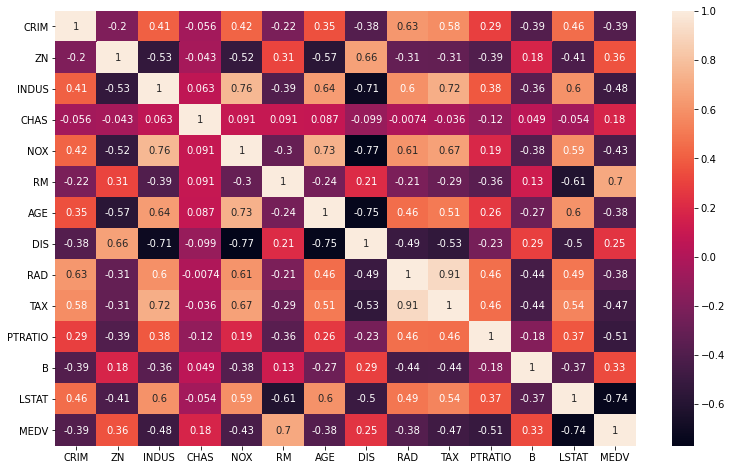

In [3]:
# correlation matrix
plt.figure(figsize = (13,8))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

There is only one very significant correlation in the variables `TAX` and `RAD` which have a correlation of **0.91**. 

Some of the other relatively high correlation coefficients between predictor variables are 0.76 (`INDUS` and `NOX`), 0.73 (`AGE` and `NOX`), 0.72 (`TAX`, `INDUS`), -0.77, (`NOX`, `DIS`), -0.75 (`DIS`, `AGE`), etc. This shows that many of the predictor variables have moderate to high correlation which could have a negative impact on the precision of the ridge and lasso regression models.

#### Visual Catergorical Variable interaction 
Since there are two categorical variables `CHAS` (which is a binary predictor) and `RAD`, we can check if there are any interactions in the dataset with respect to these variables

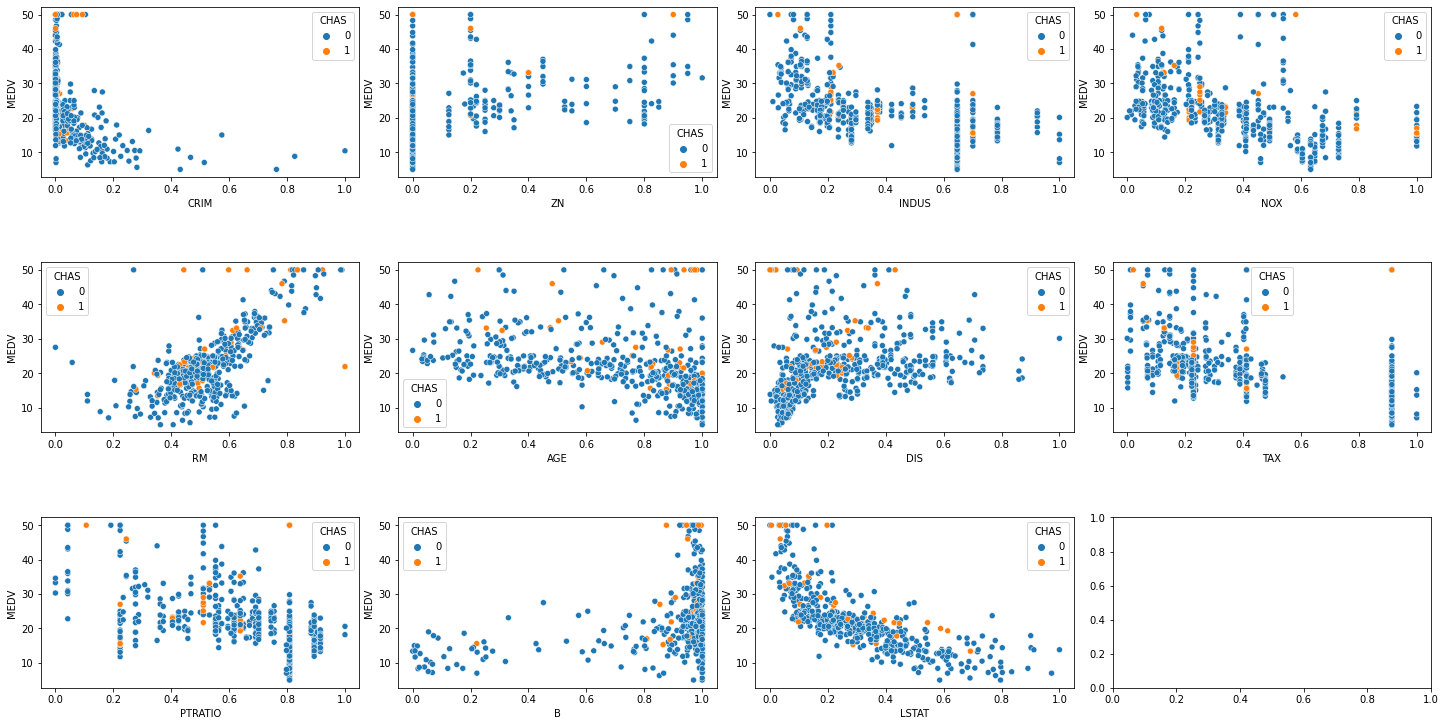

In [4]:
# First let's consider CHAS
column_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_names):
    sns.scatterplot(x=x[k], y='MEDV', data=data,ax=axs[i], hue='CHAS')
#     sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

There doesn't appear to be any significant interactions between `CHAS` and the other predictors as the points of two categories follow a similar trend with respect to `MEDV`  

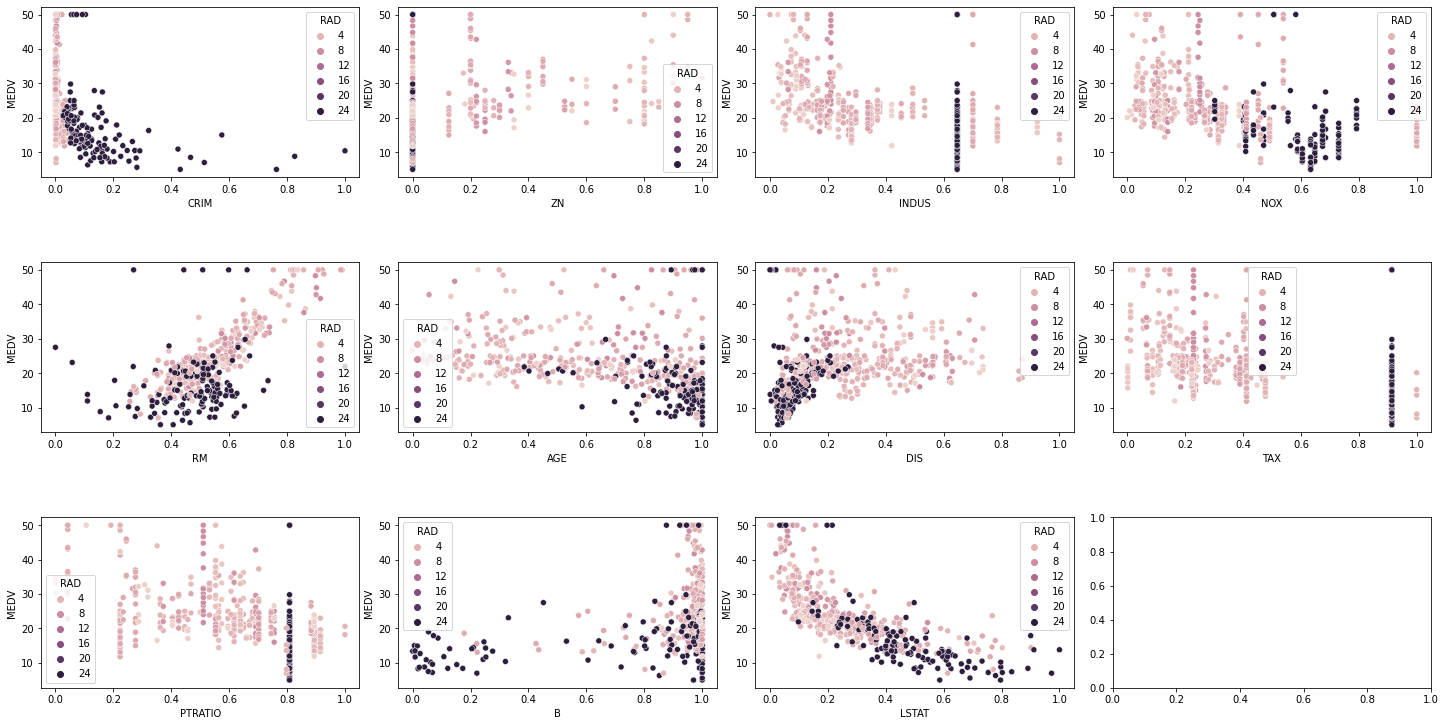

In [5]:
# Now let's consider RAD
column_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_names):
    sns.scatterplot(x=x[k], y='MEDV', data=data,ax=axs[i], hue='RAD')
#     sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In this case there appears to be interactions between `RAD` and the many other predictors with repect to the response `MEDV` as the points for the higher `RAD` values are much different than the points for the lower values of `RAD`

#### Checking for Null values and dropping duplicates in the data

In [6]:
data.shape

(506, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


There are no null values in the data.

In [8]:
# Drop any duplicate points (if any)
data.drop_duplicates();

#### Summary of the Data Exploration:
After some data exploration it was observed that The Boston Housing Dataset has moderate to strongly correlated predictor variables as well as interactions between the variable `RAD` and other predictors. <br>


## Models: Lasso and Ridge

In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

To handle categorical attributes “CHAS” and “RAD” we have to add dummy variables 

In [10]:
# dummies = pd.get_dummies(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
dummies = pd.get_dummies(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']], columns= ["RAD"])
X = dummies
y = df['MEDV']

#### General Procedure
- Split the dataset into training and test sets where the test size was 20%
<br>**The following will be repeated 4 times:**
- Trained the data with Ridge or Lasso regression (separately) with 10-fold  cross validation to find to find optimal alpha value ( same as lambda from lecture slides) 
- Then trained the data on regular Ridge and Lasso using the optimal alpha value from the cross validation 
- Predicted housing values using test set and reported mean squared error and R^2 values


### Ridge Regression

In [11]:
#Ridge Regression
lambdas = 10**np.linspace(10,-2,100)*0.5  
print("λ values: ", lambdas)

ridge = Ridge(normalize = True)
coefs = []

λ values:  [5.00000000e+09 3.78231664e+09 2.86118383e+09 2.16438064e+09
 1.63727458e+09 1.23853818e+09 9.36908711e+08 7.08737081e+08
 5.36133611e+08 4.05565415e+08 3.06795364e+08 2.32079442e+08
 1.75559587e+08 1.32804389e+08 1.00461650e+08 7.59955541e+07
 5.74878498e+07 4.34874501e+07 3.28966612e+07 2.48851178e+07
 1.88246790e+07 1.42401793e+07 1.07721735e+07 8.14875417e+06
 6.16423370e+06 4.66301673e+06 3.52740116e+06 2.66834962e+06
 2.01850863e+06 1.52692775e+06 1.15506485e+06 8.73764200e+05
 6.60970574e+05 5.00000000e+05 3.78231664e+05 2.86118383e+05
 2.16438064e+05 1.63727458e+05 1.23853818e+05 9.36908711e+04
 7.08737081e+04 5.36133611e+04 4.05565415e+04 3.06795364e+04
 2.32079442e+04 1.75559587e+04 1.32804389e+04 1.00461650e+04
 7.59955541e+03 5.74878498e+03 4.34874501e+03 3.28966612e+03
 2.48851178e+03 1.88246790e+03 1.42401793e+03 1.07721735e+03
 8.14875417e+02 6.16423370e+02 4.66301673e+02 3.52740116e+02
 2.66834962e+02 2.01850863e+02 1.52692775e+02 1.15506485e+02
 8.73764200e+

Text(0, 0.5, 'coefficients')

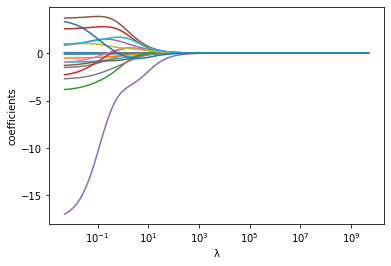

In [12]:
# For each α value fit the model and plot λ vs coefficients
for λ in lambdas:
    ridge.set_params(alpha = λ)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('coefficients')

The λ values behave as expected:
Ridge and Lasso regression regularize the linear regression by imposing a penalty on the size of coefficients
- When the λ’s were large, the penalty term is very large so the β is driven to zero
- When the λ’s were small, the penalty is not as large, so the optimization favors a better selection of the β vector


In [13]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Find the optimal α value using cross validation
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
print("λ value: ", ridgecv.alpha_)

# Using the optimal α to apply ridge regression model
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train) # Fit a ridge regression on the training data
pred = ridge.predict(X_test)  # Use this model to predict the test data
results_ridge =  pd.Series(ridge.coef_, index = X.columns)
print("\n Coefficients: \n", pd.Series(ridge.coef_, index = X.columns)) # Print coefficients
ridge_mse = mean_squared_error(y_test, pred)
print("\nMean squared error: ", mean_squared_error(y_test, pred)) # Use this model to predict the test data


λ value:  0.06164233697210317

 Coefficients: 
 CRIM       -0.091985
ZN          0.048255
INDUS      -0.076575
CHAS        1.440306
NOX       -12.647999
RM          3.362380
AGE         0.004999
DIS        -1.023857
TAX        -0.002798
PTRATIO    -0.835468
B           0.008660
LSTAT      -0.477832
RAD_1      -3.587521
RAD_2      -0.598936
RAD_3       0.700142
RAD_4      -0.835709
RAD_5      -0.675505
RAD_6      -2.944628
RAD_7       0.681946
RAD_8       0.725187
RAD_24      2.345582
dtype: float64

Mean squared error:  23.110737283676645


In [14]:
r_score = ridge.score(X_test, y_test)
print("Ridge R^2 test w/ RAD: ", r_score)

Ridge R^2 test w/ RAD:  0.7366380658097385


### Lasso Regression

In [15]:
#print("Info: ", X.info())
lambdas = 10**np.linspace(10,-2,100)*0.5
print("λ values: \n", lambdas)

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

λ values: 
 [5.00000000e+09 3.78231664e+09 2.86118383e+09 2.16438064e+09
 1.63727458e+09 1.23853818e+09 9.36908711e+08 7.08737081e+08
 5.36133611e+08 4.05565415e+08 3.06795364e+08 2.32079442e+08
 1.75559587e+08 1.32804389e+08 1.00461650e+08 7.59955541e+07
 5.74878498e+07 4.34874501e+07 3.28966612e+07 2.48851178e+07
 1.88246790e+07 1.42401793e+07 1.07721735e+07 8.14875417e+06
 6.16423370e+06 4.66301673e+06 3.52740116e+06 2.66834962e+06
 2.01850863e+06 1.52692775e+06 1.15506485e+06 8.73764200e+05
 6.60970574e+05 5.00000000e+05 3.78231664e+05 2.86118383e+05
 2.16438064e+05 1.63727458e+05 1.23853818e+05 9.36908711e+04
 7.08737081e+04 5.36133611e+04 4.05565415e+04 3.06795364e+04
 2.32079442e+04 1.75559587e+04 1.32804389e+04 1.00461650e+04
 7.59955541e+03 5.74878498e+03 4.34874501e+03 3.28966612e+03
 2.48851178e+03 1.88246790e+03 1.42401793e+03 1.07721735e+03
 8.14875417e+02 6.16423370e+02 4.66301673e+02 3.52740116e+02
 2.66834962e+02 2.01850863e+02 1.52692775e+02 1.15506485e+02
 8.73764200e

Text(0, 0.5, 'weights')

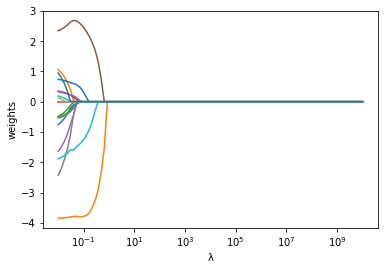

In [16]:
# For each α value fit the model and plot λ vs coefficients
for λ in lambdas:
    lasso.set_params(alpha=λ)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(lambdas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('weights')

From the figure above, Lasso drives coefficients to zero much quicker than the Ridge regression. This is a consequence of the shape and nature of the L1 norm which allows for coefficients to be set to zero. The magnitude of the coefficients in Ridge is much higher for certain variables than in Lasso regression.


In [17]:
#Perform 10-fold cross-validation to choose the best λ, refit the model, and compute the associated test error:

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))
print("\nMean squared error: ", mean_squared_error(y_test, lasso.predict(X_test)))

# Some of the coefficients are now reduced to exactly zero
results_lasso = pd.Series(lasso.coef_, index=X.columns)
print("\nNew coefficients:\n", pd.Series(lasso.coef_, index=X.columns))



Mean squared error:  22.448441524955882

New coefficients:
 CRIM       -0.101130
ZN          0.062845
INDUS      -0.043202
CHAS        1.304383
NOX       -16.340509
RM          3.179704
AGE         0.008150
DIS        -1.329288
TAX        -0.005735
PTRATIO    -0.888832
B           0.008599
LSTAT      -0.528166
RAD_1      -3.136548
RAD_2      -0.245179
RAD_3       1.300276
RAD_4      -0.006810
RAD_5      -0.000000
RAD_6      -2.220763
RAD_7       1.580950
RAD_8       1.377779
RAD_24      4.408863
dtype: float64


In [18]:
l_score = lasso.score(X_test, y_test)
print("Lasso R^2 test w/ no RAD: ", l_score)

Lasso R^2 test w/ no RAD:  0.744185358216801


## Ridge and Lasso after dropping `RAD`

In this case we decided to drop `RAD` since it was both highly correlated with `TAX` and also interacted with several other predictor variables

In [19]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
dummies = pd.get_dummies(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
X = dummies
y = df['MEDV']

In [20]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

### Ridge regression without `RAD`

λ values:  [5.00000000e+09 3.78231664e+09 2.86118383e+09 2.16438064e+09
 1.63727458e+09 1.23853818e+09 9.36908711e+08 7.08737081e+08
 5.36133611e+08 4.05565415e+08 3.06795364e+08 2.32079442e+08
 1.75559587e+08 1.32804389e+08 1.00461650e+08 7.59955541e+07
 5.74878498e+07 4.34874501e+07 3.28966612e+07 2.48851178e+07
 1.88246790e+07 1.42401793e+07 1.07721735e+07 8.14875417e+06
 6.16423370e+06 4.66301673e+06 3.52740116e+06 2.66834962e+06
 2.01850863e+06 1.52692775e+06 1.15506485e+06 8.73764200e+05
 6.60970574e+05 5.00000000e+05 3.78231664e+05 2.86118383e+05
 2.16438064e+05 1.63727458e+05 1.23853818e+05 9.36908711e+04
 7.08737081e+04 5.36133611e+04 4.05565415e+04 3.06795364e+04
 2.32079442e+04 1.75559587e+04 1.32804389e+04 1.00461650e+04
 7.59955541e+03 5.74878498e+03 4.34874501e+03 3.28966612e+03
 2.48851178e+03 1.88246790e+03 1.42401793e+03 1.07721735e+03
 8.14875417e+02 6.16423370e+02 4.66301673e+02 3.52740116e+02
 2.66834962e+02 2.01850863e+02 1.52692775e+02 1.15506485e+02
 8.73764200e+

Text(0, 0.5, 'weights')

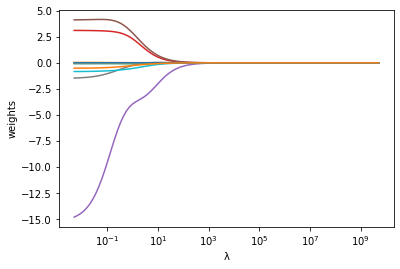

In [21]:
#Ridge Regression
lambdas = 10**np.linspace(10,-2,100)*0.5  
print("λ values: ", lambdas)

ridge = Ridge(normalize = True)
coefs = []

# For each α value fit the model and plot alpha vs coefficients
for λ in lambdas:
    ridge.set_params(alpha = λ )
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('weights')

The graph above is similar to the ridge model with `RAD` in terms of the behavior of the λ values

In [22]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Find the optimal α value using cross validation
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
print("λ value: ", ridgecv.alpha_)

# Using the optimal α to apply ridge regression model
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train) # Fit a ridge regression on the training data
pred = ridge.predict(X_test)  # Use this model to predict the test data
results_ridge_mod =  pd.Series(ridge.coef_, index = X.columns)
print("\n Coefficients: \n", pd.Series(ridge.coef_, index = X.columns)) # Print coefficients
ridge_mse_mod = mean_squared_error(y_test, pred)
print("\nMean squared error: ", mean_squared_error(y_test, pred)) # Use this model to predict the test data

λ value:  0.026683496156031508

 Coefficients: 
 CRIM       -0.075512
ZN          0.043540
INDUS      -0.056472
CHAS        2.481992
NOX       -14.910269
RM          3.480742
AGE        -0.001513
DIS        -1.313067
TAX         0.001932
PTRATIO    -0.865079
B           0.006361
LSTAT      -0.511279
dtype: float64

Mean squared error:  24.834683586003127


In [23]:
r_score_no_RAD = ridge.score(X_test, y_test)
print("Ridge R^2 test w/ no RAD: ", r_score_no_RAD)

Ridge R^2 test w/ no RAD:  0.7487064697317529


### Lasso regression without `RAD`

λ values: 
 [5.00000000e+09 3.78231664e+09 2.86118383e+09 2.16438064e+09
 1.63727458e+09 1.23853818e+09 9.36908711e+08 7.08737081e+08
 5.36133611e+08 4.05565415e+08 3.06795364e+08 2.32079442e+08
 1.75559587e+08 1.32804389e+08 1.00461650e+08 7.59955541e+07
 5.74878498e+07 4.34874501e+07 3.28966612e+07 2.48851178e+07
 1.88246790e+07 1.42401793e+07 1.07721735e+07 8.14875417e+06
 6.16423370e+06 4.66301673e+06 3.52740116e+06 2.66834962e+06
 2.01850863e+06 1.52692775e+06 1.15506485e+06 8.73764200e+05
 6.60970574e+05 5.00000000e+05 3.78231664e+05 2.86118383e+05
 2.16438064e+05 1.63727458e+05 1.23853818e+05 9.36908711e+04
 7.08737081e+04 5.36133611e+04 4.05565415e+04 3.06795364e+04
 2.32079442e+04 1.75559587e+04 1.32804389e+04 1.00461650e+04
 7.59955541e+03 5.74878498e+03 4.34874501e+03 3.28966612e+03
 2.48851178e+03 1.88246790e+03 1.42401793e+03 1.07721735e+03
 8.14875417e+02 6.16423370e+02 4.66301673e+02 3.52740116e+02
 2.66834962e+02 2.01850863e+02 1.52692775e+02 1.15506485e+02
 8.73764200e

Text(0, 0.5, 'weights')

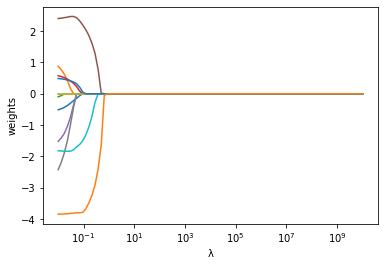

In [24]:
# Lasso

lambdas = 10**np.linspace(10,-2,100)*0.5
print("λ values: \n", lambdas)

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

# For each α value fit the model and plot alpha vs coefficients
for λ in lambdas:
    lasso.set_params(alpha=λ)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(lambdas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('weights')

The graph above is similar to the lasso model with `RAD` in terms of the behavior of the λ values

In [25]:
#Perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

# Fit a regular lasso model with the optimal lambda value from the cross validation
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
predict = lasso.predict(X_test)
lasso_mse_mod = mean_squared_error(y_test,predict )
print("\nMean squared error: ", mean_squared_error(y_test, lasso.predict(X_test)))

# Some of the coefficients are now reduced to exactly zero
results_lasso_mod = pd.Series(lasso.coef_, index=X.columns)
print("\nNew coefficients:\n", pd.Series(lasso.coef_, index=X.columns))


Mean squared error:  24.902873666716552

New coefficients:
 CRIM       -0.057496
ZN          0.039761
INDUS      -0.016730
CHAS        2.172716
NOX       -13.408384
RM          3.487117
AGE        -0.000000
DIS        -1.188105
TAX         0.000000
PTRATIO    -0.839858
B           0.005386
LSTAT      -0.533956
dtype: float64


In [26]:
l_score_no_RAD = lasso.score(X_test, y_test)
print("Lasso R^2 test w/ no RAD: ", l_score_no_RAD)

Lasso R^2 test w/ no RAD:  0.7480164780089911


## Summary of results:

In [27]:
# Coefficients
pd.concat([results_ridge,results_ridge_mod, results_lasso, results_lasso_mod], axis=1, keys=["Ridge","Ridge (RAD dropped)", "Lasso", "Lasso (RAD dropped)"])

,Ridge,Ridge (RAD dropped),Lasso,Lasso (RAD dropped)
CRIM,-0.091985,-0.075512,-0.101130,-0.057496
ZN,0.048255,0.043540,0.062845,0.039761
INDUS,-0.076575,-0.056472,-0.043202,-0.016730
CHAS,1.440306,2.481992,1.304383,2.172716
NOX,-12.647999,-14.910269,-16.340509,-13.408384
RM,3.362380,3.480742,3.179704,3.487117
AGE,0.004999,-0.001513,0.008150,-0.000000
DIS,-1.023857,-1.313067,-1.329288,-1.188105
TAX,-0.002798,0.001932,-0.005735,0.000000
PTRATIO,-0.835468,-0.865079,-0.888832,-0.839858


For the models when `RAD` was dropped, some the coefficients make more sense when compared to models with `RAD`.
<br> For example:
- The coefficient for `AGE` is negative for models without `RAD`. This makes sense as the age of the house increases, we can generally expect the median price to go down.
- The coefficient for `TAX` is positive (or 0 in the case for Lasso) for models without `RAD`. This makes sense as we would expect houses with higher property tax to have a higher value rather than a lower value (models with `RAD`).

In [28]:
# Mean Squared Error
pd.Series([ridge_mse, ridge_mse_mod, lasso_mse, lasso_mse_mod], index = ["Ridge","Ridge (RAD dropped)", "Lasso", "Lasso (RAD dropped)"])

Ridge                  23.110737
Ridge (RAD dropped)    24.834684
Lasso                  22.448442
Lasso (RAD dropped)    24.902874
dtype: float64

In [29]:
# Coefficients of Determination (R^2)
pd.Series([r_score, r_score_no_RAD, l_score, l_score_no_RAD], index = ["Ridge","Ridge (RAD dropped)", "Lasso", "Lasso (RAD dropped)"])

Ridge                  0.736638
Ridge (RAD dropped)    0.748706
Lasso                  0.744185
Lasso (RAD dropped)    0.748016
dtype: float64

By observing the mean squared error we see that the Lasso model (with `RAD`) outperformed the Ridge model. However when `RAD` is dropped, the Ridge model performs better than Lasso. This is the same case of R^2.

By observing the R^2 value, we can see that Ridge and Lasso without `RAD` perform the best.

Even though mean squared error is higher for RAD dropped, the R^2 value improves and the estimated coefficients appear to be more accurate (at least for `AGE` and `TAX` as discussed above)

By removing the highly correlated variable RAD, we slighty improved the performance of the Ridge and Lasso regression models.


### Issues due to Multicollinearity
Our coefficient estimates seem to be affected significantly by which predictor variables are included in the model. In addition the coefficients seem to be sensitive to small changes in model.

This could be due to the multicollinearity in the predictors. Having multicollinearity weakens regression model because precision of estimated coefficients is reduced.
### Possible Fixes:
The variables with correlation terms higher than 0.7 can be candidates for removal.

### Future Improvements:
- Check for numerical interactions in predictor variables,  especially with NOX, by adding interaction terms to model matrix ( check if lasso drives their coefficients to zero)
- Dealing with outliers better
- Dropping variables with moderately high correlation such as “DIS”  and  “NOX” and checking if our models perform better in terms of both R^2 and MSE
